In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [9]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

C:\Users\haide\AppData\Local\Temp\ipykernel_7556\960405603.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
C:\Users\haide\AppData\Local\Temp\ipykernel_7556\960405603.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
C:\Users\haide\AppData\Local\Temp\ipykerne

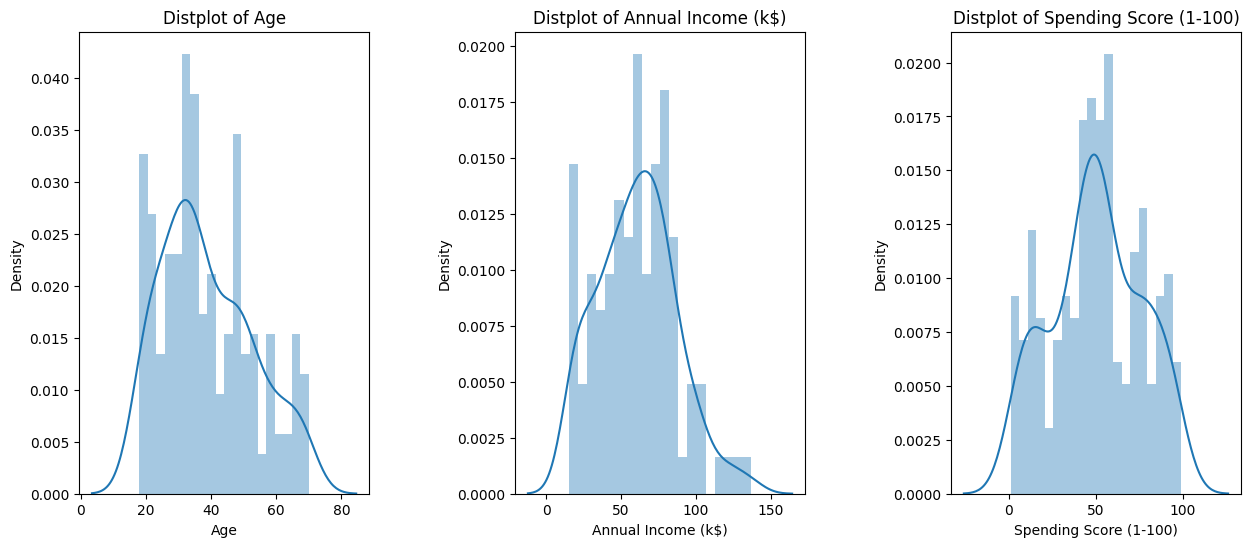

In [10]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()


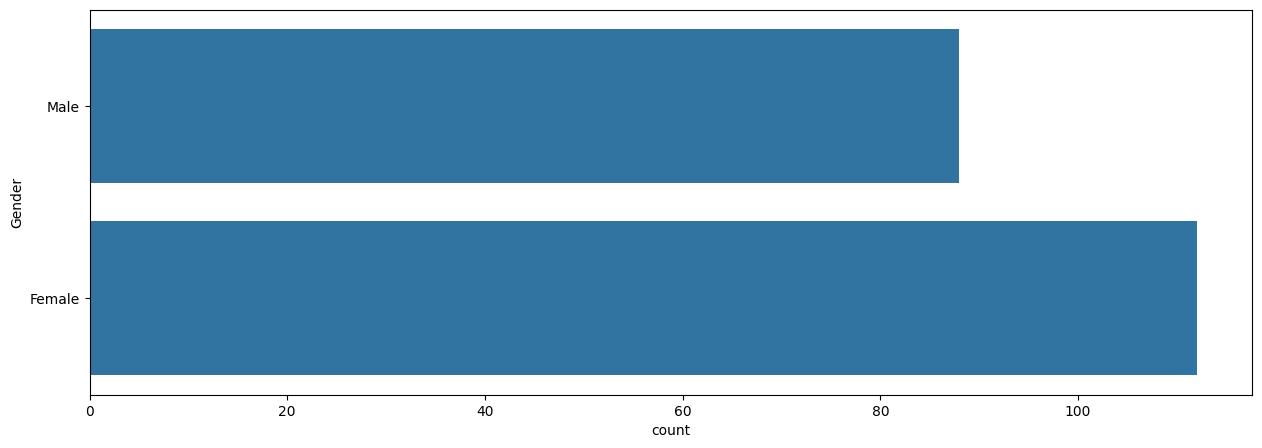

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show()

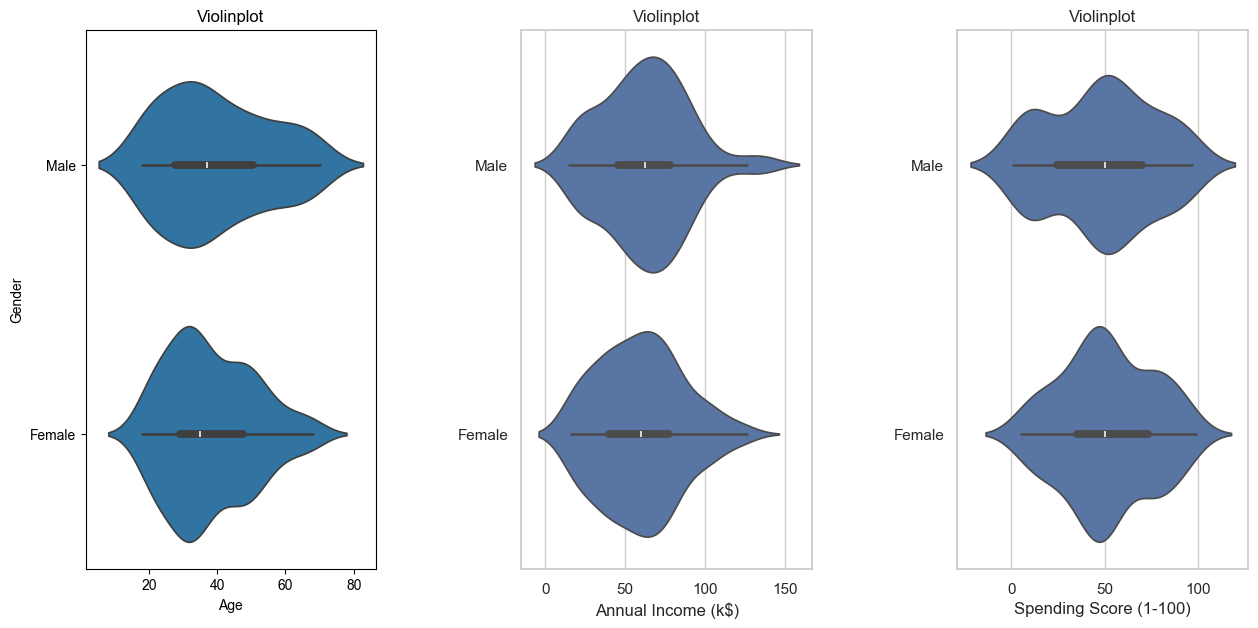

In [12]:
plt.figure(1, figsize=(15, 7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols , y= 'Gender', data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violinplot')
plt.show()


C:\Users\haide\AppData\Local\Temp\ipykernel_7556\3534015358.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ageX,y=ageY,palette='mako')


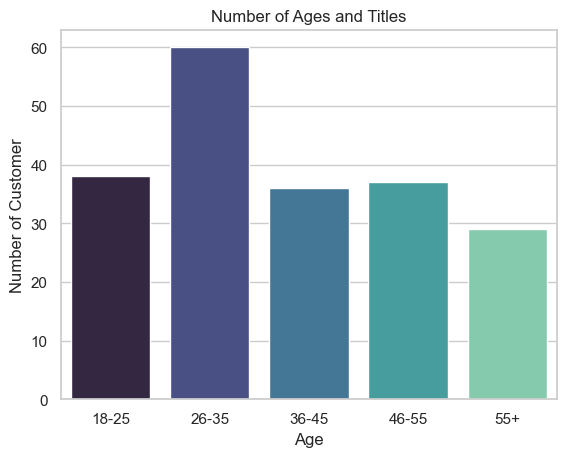

In [13]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <=25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <=35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <=45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <=55)]
ageAbove_55 = df.Age[(df.Age >= 56)]
ageX =['18-25','26-35','36-45','46-55','55+']
ageY=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(ageAbove_55.values)]
plt.figure(figure=(15,6))
sns.barplot(x=ageX,y=ageY,palette='mako')
plt.title("Number of Ages and Titles")
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()





<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

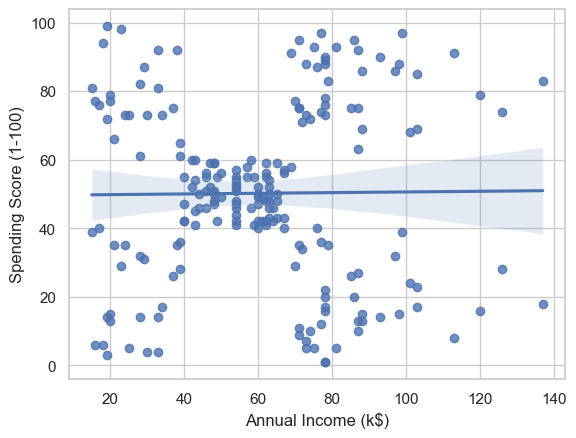

In [14]:
sns.regplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df)

C:\Users\haide\AppData\Local\Temp\ipykernel_7556\3213494270.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="Spectral")


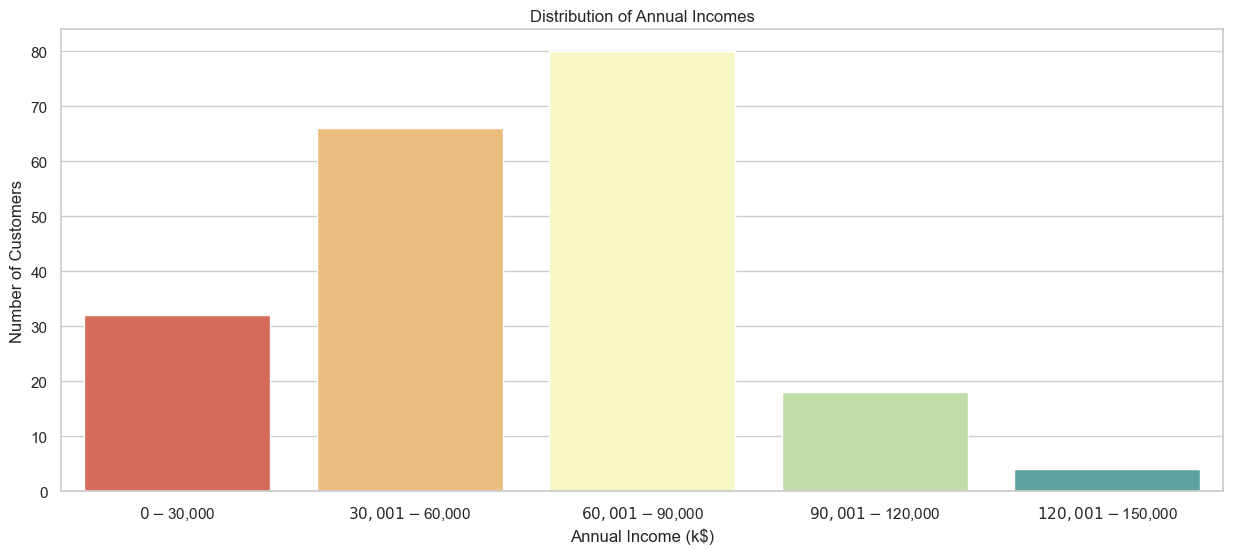

In [15]:
# Correctly categorize the annual incomes into different groups
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] > 30) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] > 60) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] > 90) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] > 120) & (df["Annual Income (k$)"] <= 150)]

# Labels and values for the plot
aix = ['$0 - $30,000', '$30,001 - $60,000', '$60,001 - $90,000', '$90,001 - $120,000', '$120,001 - $150,000']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

# Plotting the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Distribution of Annual Incomes")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Number of Customers")
plt.show()


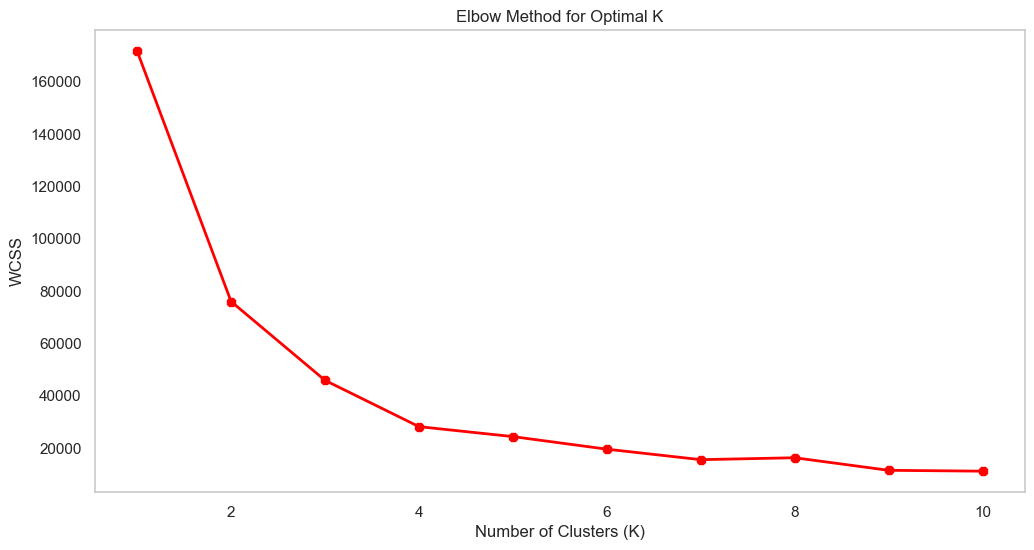

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df is your DataFrame and X1 is defined correctly
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

# Initialize list to hold WCSS values
wcss = []

# Loop over the range of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.grid()
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [17]:
kmeans = KMeans(n_clusters=4, init="k-means++")

# Fit the model and predict the cluster labels
labels = kmeans.fit_predict(X1)

# Print the cluster labels and cluster centers
print(labels)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [18]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


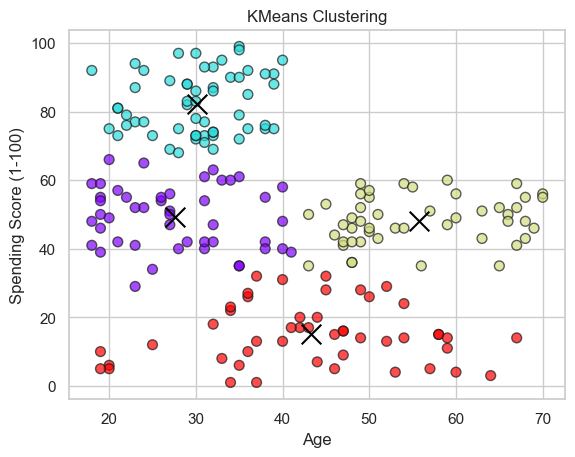

In [19]:


# Plotting the data points colored by cluster
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap='rainbow', s=50, alpha=0.7, edgecolors='k')

# Plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', s=200, marker='x')

# Adding labels and title
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering")
plt.show()


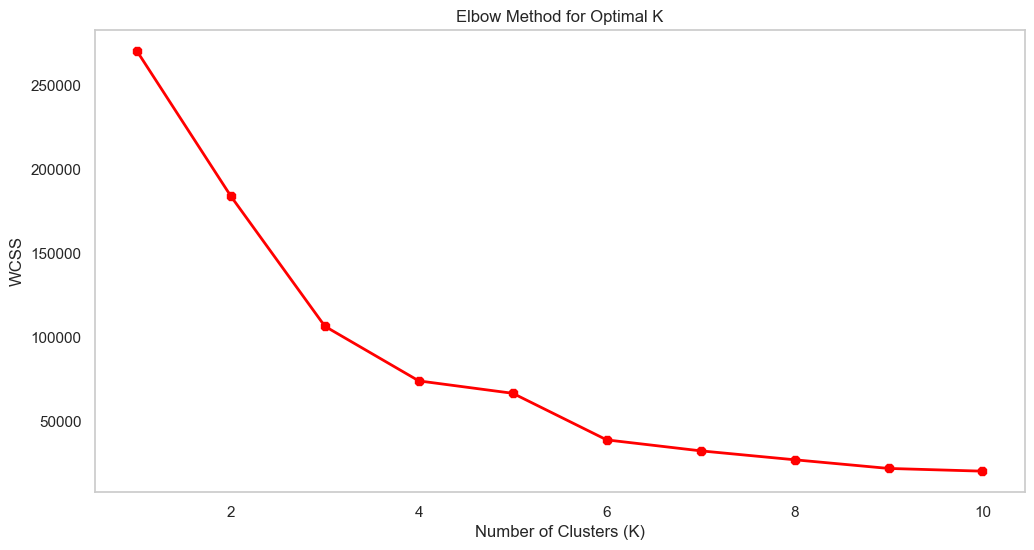

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Correct the column names
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

# Initialize list to hold WCSS values
wcss = []

# Loop over the range of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.grid()
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [22]:
kmeans = KMeans(n_clusters=5, init="k-means++")

# Fit the model and predict the cluster labels
labels = kmeans.fit_predict(X2)

# Print the cluster labels and cluster centers
print(labels)

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 4 3 0 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 0 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


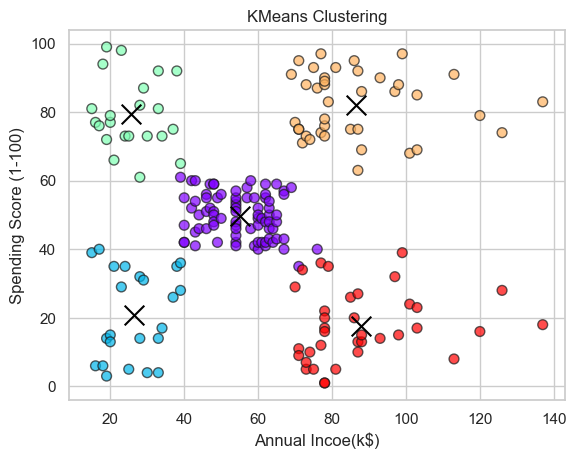

In [23]:


# Plotting the data points colored by cluster
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, cmap='rainbow', s=50, alpha=0.7, edgecolors='k')

# Plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', s=200, marker='x')

# Adding labels and title
plt.xlabel("Annual Incoe(k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering")
plt.show()


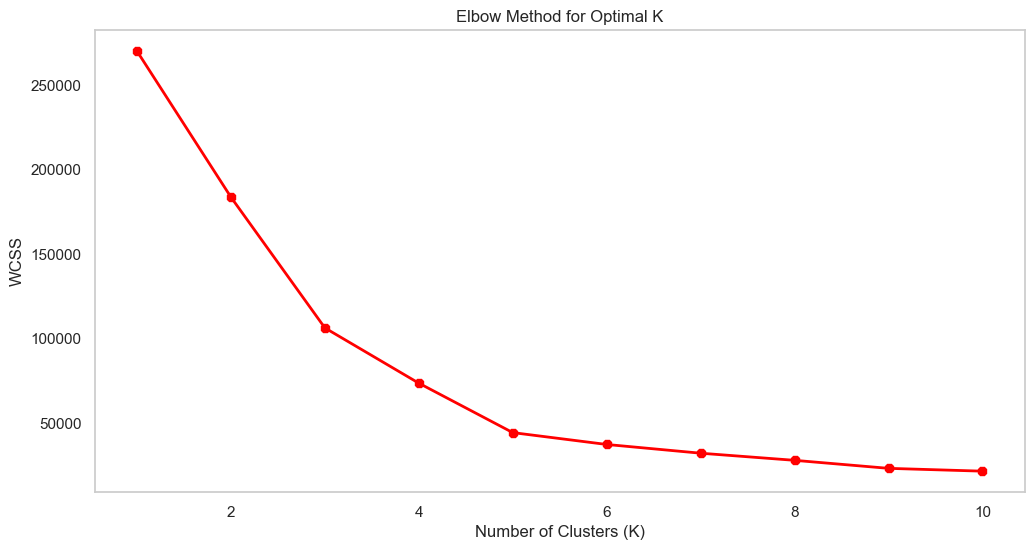

In [25]:


# Correct the column names
X3 = df.iloc[:,1:]

# Initialize list to hold WCSS values
wcss = []

# Loop over the range of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.grid()
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [26]:
kmeans = KMeans(n_clusters=5, init="k-means++")

# Fit the model and predict the cluster labels
labels = kmeans.fit_predict(X3)

# Print the cluster labels and cluster centers
print(labels)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 1 3 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 0 2 4 2 0 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [27]:
print(kmeans.cluster_centers_)

[[53.50943396 54.73584906 48.47169811]
 [24.8        41.46       63.7       ]
 [32.69230769 86.53846154 82.12820513]
 [44.14285714 25.14285714 19.52380952]
 [40.32432432 87.43243243 18.18918919]]


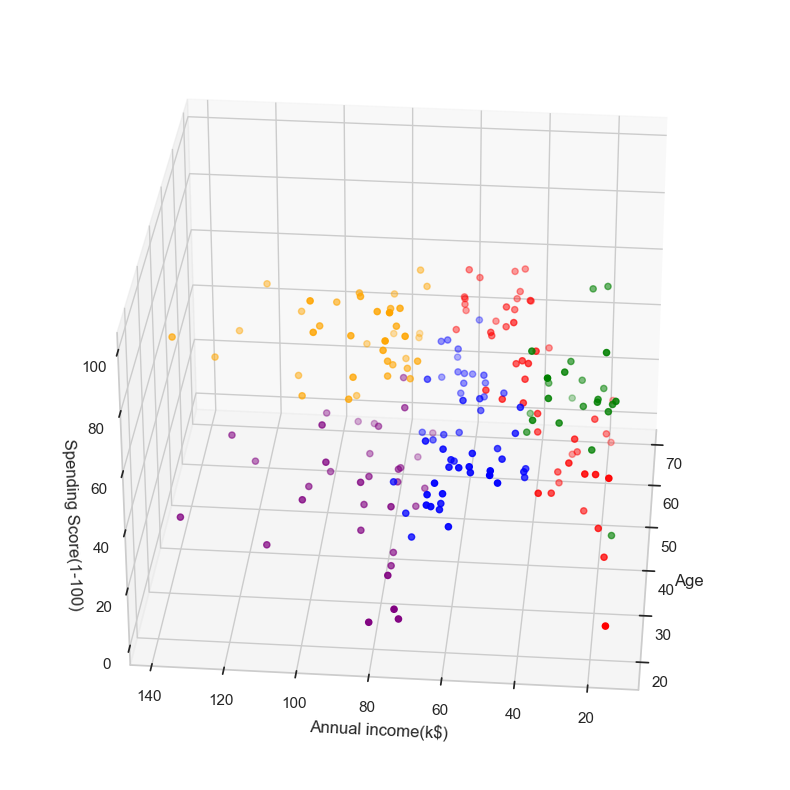

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming you have already run KMeans clustering and X3 is defined correctly
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

# Plotting in 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green')
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange')
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple')

# Setting the view angle
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual income(k$)")
ax.set_zlabel("Spending Score(1-100)")
# Show the plot
plt.show()
